# Load librearies

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Load data

In [5]:
data = pd.read_csv("token_datasets.csv")
data.head()

,Posts,label,tokenized_text,filtered_text,lemmatized_text
0,so my mum is textbook abusive but not often en...,Positive,"['so', 'my', 'mum', 'is', 'textbook', 'abusive...","['mum', 'textbook', 'abusive', 'often', 'enoug...","['mum', 'textbook', 'abusive', 'often', 'enoug..."
1,hello i have never made a reddit post before b...,Depression/Suicidal Thoughts,"['hello', 'i', 'have', 'never', 'made', 'a', '...","['hello', 'never', 'made', 'reddit', 'post', '...","['hello', 'never', 'made', 'reddit', 'post', '..."
2,i m have tried to be nice to my parents and su...,Positive,"['i', 'm', 'have', 'tried', 'to', 'be', 'nice'...","['tried', 'nice', 'parents', 'support', 'years...","['tried', 'nice', 'parent', 'support', 'year',..."
3,i need some advice it will be a bit long but i...,Depression/Suicidal Thoughts,"['i', 'need', 'some', 'advice', 'it', 'will', ...","['need', 'advice', 'bit', 'long', 'necessary',...","['need', 'advice', 'bit', 'long', 'necessary',..."
4,hello im f from the ph with no close friends o...,Neutral,"['hello', 'im', 'f', 'from', 'the', 'ph', 'wit...","['hello', 'im', 'f', 'ph', 'close', 'friends',...","['hello', 'im', 'f', 'ph', 'close', 'friend', ..."


In [6]:
data = data.drop(['Posts','tokenized_text','filtered_text'], axis=1)
data.head()

,label,lemmatized_text
0,Positive,"['mum', 'textbook', 'abusive', 'often', 'enoug..."
1,Depression/Suicidal Thoughts,"['hello', 'never', 'made', 'reddit', 'post', '..."
2,Positive,"['tried', 'nice', 'parent', 'support', 'year',..."
3,Depression/Suicidal Thoughts,"['need', 'advice', 'bit', 'long', 'necessary',..."
4,Neutral,"['hello', 'im', 'f', 'ph', 'close', 'friend', ..."


# Word Vectorization

In [7]:
vectorizer = CountVectorizer()
vec_transformed = vectorizer.fit_transform(data.lemmatized_text)
DocTermMatrix = pd.DataFrame(vec_transformed.toarray(), columns=vectorizer.get_feature_names_out())
DocTermMatrix.head()

,aaaaa,aaaand,aaahhhhhh,aaron,ab,aba,aback,abandon,abandoned,abandoning,...,zoim,zombie,zomble,zone,zoned,zoning,zoo,zookeepers,zoom,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Label re-encoding

In [9]:
labelling = data.iloc[:,0]
labelling.head(10)

0                        Positive
1    Depression/Suicidal Thoughts
2                        Positive
3    Depression/Suicidal Thoughts
4                         Neutral
5                        Positive
6                         Neutral
7                        Positive
8                        Positive
9                        Positive
Name: label, dtype: object

In [10]:
labelEncoder = LabelEncoder()
labelling_transformed = labelEncoder.fit_transform(labelling)

In [11]:
labelling_transformed[:10]

array([2, 0, 2, 0, 1, 2, 1, 2, 2, 2])

In [21]:
list(labelEncoder.classes_)

['Depression/Suicidal Thoughts', 'Neutral', 'Positive']

# Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(DocTermMatrix, labelling_transformed,
                                                    test_size=1/3, random_state=42)

In [32]:
unique_values, counts = np.unique(y_train, return_counts=True)

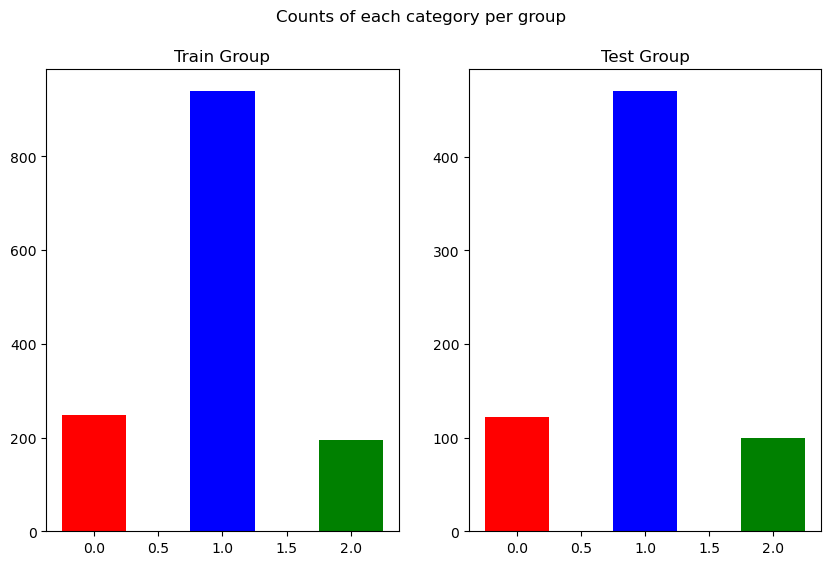

In [44]:
plt.figure(figsize=(10,6))
plt.suptitle("Counts of each category per group")
plt.subplot(121)
unique_values, counts = np.unique(y_train, return_counts=True)
plt.bar(unique_values, counts, width = 0.5,
        color = ["red", "blue", "green"])
plt.title("Train Group")

plt.subplot(122)
unique_values, counts = np.unique(y_test, return_counts=True)
plt.bar(unique_values, counts, width = 0.5,
        color = ["red", "blue", "green"])
plt.title("Test Group")

plt.show()